# Binary Classification - MNIST

In [43]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone, BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [2]:
mnist: fetch_openml = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X: np.ndarray = mnist['data']
y: np.ndarray = mnist['target']

In [4]:
print(f'Shape of X: {X.shape}')

Shape of X: (70000, 784)


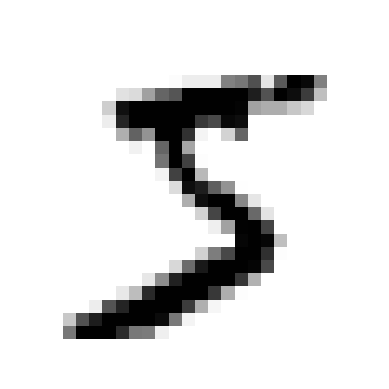

In [5]:
y = y.astype(int)

some_digit: np.ndarray = X.iloc[0].to_numpy()
some_digit_image: np.ndarray = some_digit.reshape(28, 28)

plt.imshow(
    some_digit_image,
    cmap=mpl.cm.binary,
    interpolation='nearest'
)

plt.axis('off')
plt.show()

In [6]:
y[0]

np.int64(5)

In [7]:
X_train: np.ndarray = X[:60000]
X_test: np.ndarray = X[60000:]
y_train: np.ndarray = y[:60000]
y_test: np.ndarray = y[60000:]

As we're working with binary classification and the `MNIST` has 10 classes. We'll set up a binary classification problem by selecting only two classes from the dataset. We'll select if the digit is `5` or not.

In [8]:
y_train_5: np.ndarray = (y_train == 5)
y_test_5: np.ndarray = (y_test == 5)

In [9]:
sgd_clf : SGDClassifier = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Metric

In [11]:
X_train_np: np.ndarray = X_train.to_numpy()

skfolds: StratifiedKFold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

def cross_validation_evaluation(classifier, X_train, y_train, n_splits=3, random_state=42):
    """
    Performs Stratified K-Fold cross-validation on the provided classifier.
    
    Args:
    classifier: The classifier to be evaluated.
    X_train: Features for training as a NumPy array or pandas DataFrame.
    y_train: Target labels as a NumPy array or pandas Series.
    n_splits: The number of folds for cross-validation (default is 3).
    random_state: Random seed for reproducibility (default is 42).

    Returns:
    A list of accuracy scores for each fold.
    """
    
    X_train_np = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else np.array(X_train)
    y_train_np = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
    
    skfolds = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    accuracy_scores = []

    for train_index, test_index in skfolds.split(X_train_np, y_train_np):
        clone_clf = clone(classifier)
        X_train_folds = X_train_np[train_index]
        y_train_folds = y_train_np[train_index]
        X_test_fold = X_train_np[test_index]
        y_test_fold = y_train_np[test_index]

        clone_clf.fit(X_train_folds, y_train_folds)
        
        y_pred = clone_clf.predict(X_test_fold)
        
        n_correct = sum(y_pred == y_test_fold)
        accuracy = n_correct / len(y_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores


In [12]:
class Never5Classifier(BaseEstimator):

    """
        This class is an example of a classifier that classifies every image in the "not-5" class.
        It's a dumb classifier that never classifies an image as a 5.
    """

    def fit(self, X: np.ndarray, y: np.ndarray = None) -> None:

        """
            This method does nothing.
        """

        pass

    def predict(self, X: np.ndarray) -> np.ndarray:

        """
            This method returns an array of zeros with the same length as the input array.
        """

        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_5_clf: Never5Classifier = Never5Classifier()

accuracy_scores: list = cross_validation_evaluation(
    never_5_clf,
    X_train,
    y_train_5
)

accuracy_scores

[array([0., 1., 1., ..., 1., 0., 1.]),
 array([1., 1., 0., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.])]

In [14]:
accuracy_scores: list = cross_validation_evaluation(
    sgd_clf,
    X_train,
    y_train_5
)

accuracy_scores

[np.float64(0.9669), np.float64(0.91625), np.float64(0.96785)]

In [15]:
y_train_pred: np.ndarray = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3
)

## Confusion Matrix

In [16]:
confusion_matrix(
    y_train_5,
    y_train_pred
)

array([[53892,   687],
       [ 1891,  3530]])

In [17]:
y_train_perfect_predictions: np.ndarray = y_train_5

confusion_matrix(
    y_train_5,
    y_train_perfect_predictions
)

array([[54579,     0],
       [    0,  5421]])

In [18]:
precision_score(
    y_train_5,
    y_train_pred
)

np.float64(0.8370879772350012)

In [19]:
recall_score(
    y_train_5,
    y_train_pred
)

np.float64(0.6511713705958311)

In [20]:
f1_score(
    y_train_5,
    y_train_pred
)

np.float64(0.7325171197343847)

In [21]:
y_scores: np.ndarray = sgd_clf.decision_function(
    [some_digit]
)

/home/pcmoraes/Desktop/codigos/Inteligencia-Artificial/Livros/Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [22]:
y_scores

array([2164.22030239])

In [23]:
threshold: float = 0

In [24]:
y_some_digit_pred: np.ndarray = (y_scores > threshold)

In [25]:
y_some_digit_pred

array([ True])

In [26]:
threshold: float = 8000

y_some_digit_pred: np.ndarray = (y_scores > threshold)

y_some_digit_pred

array([False])

In [27]:
y_scores : np.ndarray = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    method='decision_function'
)

In [32]:
precisions : np.ndarray
recalls : np.ndarray
thresholds : np.ndarray

precisions, recalls, thresholds = precision_recall_curve(
    y_train_5,
    y_scores
)

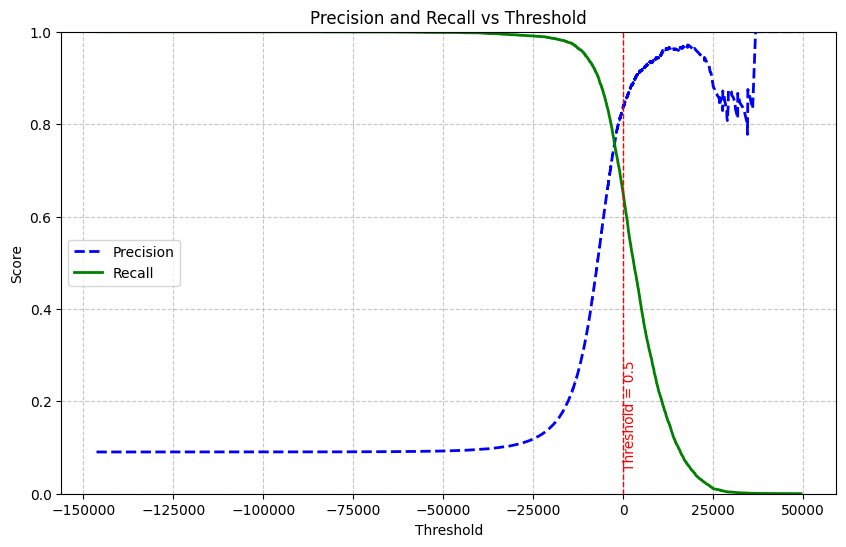

In [34]:
def plot_precision_recall_vs_threshold(precisions: np.ndarray, recalls: np.ndarray, thresholds: np.ndarray) -> None:
    """
    Plots precision and recall as functions of the threshold.
    """

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
    
        
    plt.title('Precision and Recall vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend(loc='center left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.ylim([0, 1])
    
    plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)
    plt.text(0.5, 0.05, 'Threshold = 0.5', color='red', rotation=90, va='bottom')

plot_precision_recall_vs_threshold(
    precisions,
    recalls,
    thresholds
)

plt.show()

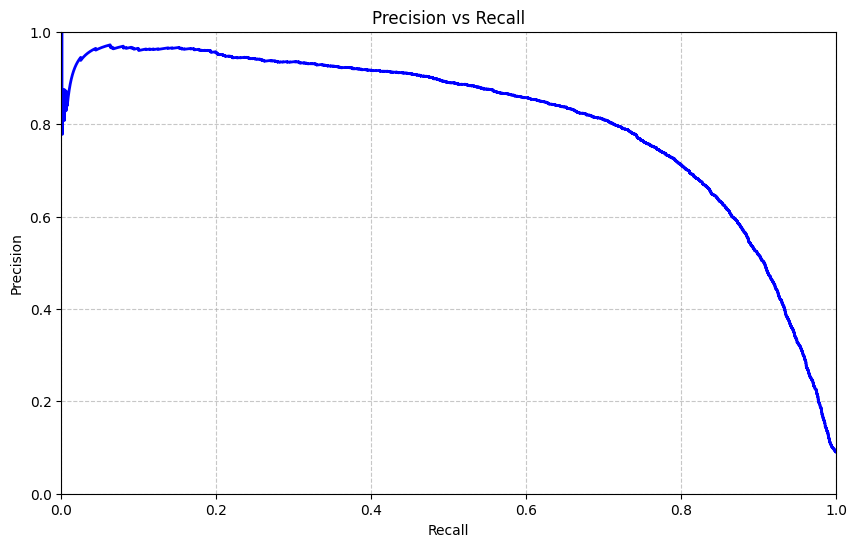

In [35]:
def precision_vs_recall(precisions: np.ndarray, recalls: np.ndarray) -> None:
    """
    Plots precision against recall.
    """

    plt.figure(figsize=(10, 6))
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    
    plt.title('Precision vs Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.xlim([0, 1])
    plt.ylim([0, 1])

precision_vs_recall(
    precisions,
    recalls
)

In [36]:
threshold_90_precision: float = thresholds[np.argmax(precisions >= 0.90)]

In [37]:
y_train_pred_90: np.ndarray = (y_scores >= threshold_90_precision)

In [38]:
precision_score(
    y_train_5,
    y_train_pred_90
)

np.float64(0.9000345901072293)

In [39]:
recall_score(
    y_train_5,
    y_train_pred_90
)

np.float64(0.4799852425751706)

In [40]:
fpr : np.ndarray
tpr : np.ndarray
thresholds : np.ndarray

fpr, tpr, thresholds = roc_curve(
    y_train_5,
    y_scores
)

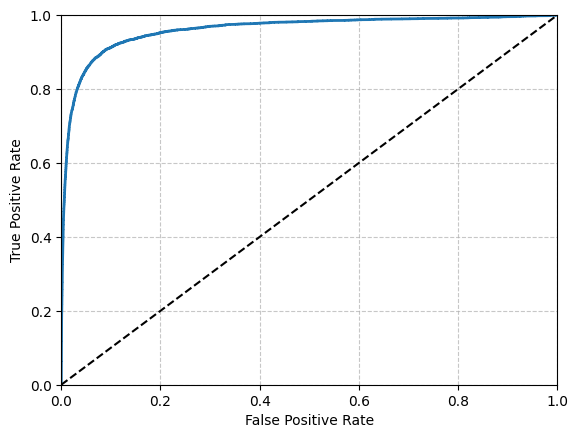

In [41]:
def plot_roc_curve(
    fpr: np.ndarray,
    tpr: np.ndarray,
    label: str = None
) -> None:
    """
    Plots the ROC curve.
    """

    plt.plot(
        fpr,
        tpr,
        linewidth=2,
        label=label
    )

    plt.plot(
        [0, 1],
        [0, 1],
        'k--'
    )

    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True, linestyle='--', alpha=0.7)


plot_roc_curve(
    fpr,
    tpr
)

In [42]:
roc_auc_score(
    y_train_5,
    y_scores
)

np.float64(0.9604938554008616)

In [44]:
forest_clf : RandomForestClassifier = RandomForestClassifier(random_state=42)

In [45]:
y_probas_forest : np.ndarray = cross_val_predict(
    forest_clf,
    X_train,
    y_train_5,
    cv=3,
    method='predict_proba'
)

In [46]:
y_socres_forest : np.ndarray = y_probas_forest[:, 1]
fpr_forest : np.ndarray
tpr_forest : np.ndarray
thresholds_forest : np.ndarray

fpr_forest, tpr_forest, thresholds_forest = roc_curve(
    y_train_5,
    y_socres_forest
)

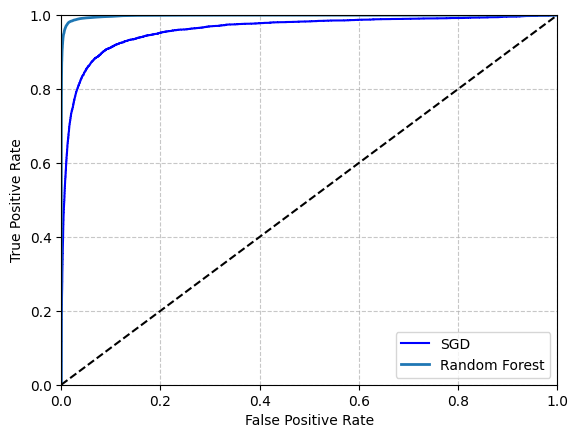

In [47]:
plt.plot(
    fpr,
    tpr,
    "b",
    label="SGD"
)

plot_roc_curve(
    fpr_forest,
    tpr_forest,
    "Random Forest"
)

plt.legend(loc='lower right')
plt.show()

In [48]:
roc_auc_score(
    y_train_5,
    y_socres_forest
)

np.float64(0.9983436731328145)